# Python Threading and ThreadPoolExecutor Demonstration  

**Author:** Praveen Kumar G (22MID0300)  
**Date:** September 2, 2025  

## Purpose  
To demonstrate how threading works in Python for I/O-bound tasks.  

- The program starts with sequential execution.  
- Then it uses manual threading with `start()` and `join()`.  
- Finally, it introduces **ThreadPoolExecutor** from the `concurrent.futures` module.  
- Examples show the effect of threading on execution time, including running multiple tasks in parallel and handling different sleep durations.  


#  Introduction to Python Threading

Threading in Python allows us to achieve **concurrency**, which means running multiple tasks seemingly at the same time.  
A **thread** is the smallest unit of execution inside a process, and all threads within a process share the same memory space.  

---

##  Why Threading?
- To perform multiple tasks at once (e.g., downloading files, handling users).  
- Best for **I/O-bound tasks** such as file operations, network requests, or database queries.  
- Improves efficiency by allowing one thread to run while another waits for I/O.  

---

##  Key Concepts Before Learning Threading

1. **Basic Python Knowledge**
   - Functions, classes, and exception handling.  

2. **Process vs Thread**
   - **Process** → Independent program with its own memory space.  
   - **Thread** → Lightweight unit inside a process that shares memory.  

3. **Global Interpreter Lock (GIL)**
   - In CPython, only one thread runs Python bytecode at a time.  
   - Threading is most effective for I/O-bound tasks, not CPU-heavy tasks.  

4. **Synchronization**
   - Shared data across threads can cause **race conditions**.  
   - Use tools like `Lock`, `RLock`, `Semaphore`, `Event`, or `queue.Queue` for safe communication.  

5. **Thread Lifecycle**
   - Create: `threading.Thread(target=...)`  
   - Start: `.start()`  
   - Wait: `.join()`  
   - Daemon threads → run in background and exit when the main program ends.  

---

##  Alternatives
- **Multiprocessing** → for CPU-bound tasks.  
- **Async (asyncio)** → for very large-scale I/O-bound tasks.  

---



##  Example 1: Running a Function Sequentially (Without Threading)

In this example, we define a simple function `do_something()` that simulates work by sleeping for 1 second.  
We call this function normally (sequential execution). The program measures the total time taken using `time.perf_counter()`.

This example helps us understand the baseline execution time before applying threading.


In [6]:
# Import the time module to measure execution time
import time

# Start a performance counter to measure total time taken
start = time.perf_counter()

# Define a function that simulates some work by sleeping for 1 second
def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)   # Program waits for 1 second
    print('Done Sleeping')

# Call the function normally (sequential execution)
do_something()

# Stop the performance counter
finish = time.perf_counter()

# Print the total time taken for execution
print(f'Finished in {round(finish-start,2)} seconds')


Sleeping 1 second...
Done Sleeping
Finished in 1.0 seconds


In [8]:
# We will run the function twice
# We use threading when we want to significantly speed up the program, but it depends on the task that you are doing
import time

start = time.perf_counter() #to find the time the entrire sequecnce takes from here

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')

do_something()
do_something()

finish = time.perf_counter() #to find the time the entrire sequecnce till here


print(f'Finished in {round(finish-start,2)} seconds')

Sleeping 1 second...
Done Sleeping
Sleeping 1 second...
Done Sleeping
Finished in 2.0 seconds


#### The function is not doing anything on the CPU, just waiting for a second

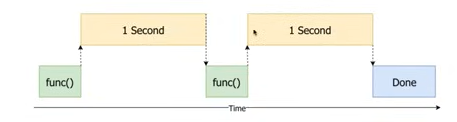

#### There are two kinds of tasks - CPU bound (Working on huge datasets) and I/O Bound (Not CPU intensive, just reading and writing data from disk, files, network operations, downloading files etc.,)

##  Threading vs Multiprocessing in Python

- **Threading** is useful mainly for **I/O-bound tasks** (e.g., file read/write, network requests).  
- It is **not very beneficial for CPU-bound tasks** (e.g., heavy calculations), because of the **Global Interpreter Lock (GIL)**.  
- In fact, threading CPU-heavy tasks can sometimes be a **disadvantage** due to the overhead of creating and destroying threads.  

---

###  How Threads Work
- Threads do not literally run Python code at the same time (because of the GIL).  
- Instead, they give the **illusion of parallelism** by switching between tasks:  
  - When one thread has to **wait** (e.g., for I/O), the Python interpreter switches to another thread.  
  - This makes programs **more efficient for waiting tasks** but not faster for CPU-heavy calculations.  

---

###  Multiprocessing vs Threading
- **Multiprocessing** is better for CPU-bound tasks since it can use **multiple cores** to run in true parallel.  
- **Threading** is better for I/O-bound tasks since it allows other tasks to run while waiting for input/output operations.


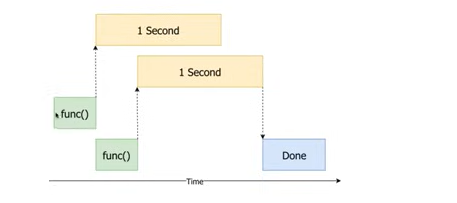

##  Thread Behavior in Python

When a threaded function starts executing, if it reaches a point where it needs to **wait**  
(for example, `time.sleep()` or waiting for I/O), the thread will **pause** and let other threads run.  

This creates the **illusion of parallel execution** because while one thread is waiting,  
another thread can continue working.


In [14]:
import threading
import time

start = time.perf_counter()

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)   # As soon as this thread starts waiting, Python can switch to another thread
    print('Done Sleeping')

# Create two threads for the same function
t1 = threading.Thread(target=do_something)
t2 = threading.Thread(target=do_something)

# Start both threads
t1.start()
t2.start()

# Ensure the main program waits for both threads to finish
t1.join()
t2.join()

finish = time.perf_counter()

print(f'Finished in {round(finish-start,2)} seconds')


Sleeping 1 second...
Sleeping 1 second...
Done Sleeping
Done Sleeping
Finished in 1.01 seconds


In [16]:
import threading     #no need to install, its already a part of python package, this is the traditional way of doing threading, more effective ways are done with pools
import time

start = time.perf_counter() 

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')

#instead the running the two functions like this, threads are used both of these
#do_something()
#do_something()

t1 = threading.Thread(target = do_something) #do not pass the function with (), as we dont intend to run the function, just pass it
t2 = threading.Thread(target = do_something)

finish = time.perf_counter() #using to find the time the entrirer sequecnce takes from here


print(f'Finished in {round(finish-start,2)} seconds')
#If I need to handle thousands of I/O-bound tasks (like network requests), should I prefer threading or async programming in Python, and why?

Finished in 0.0 seconds


##### when you run the above code you can see that it did not run anything
##### To get the threads to run, we need to use start methods on these threads

In [22]:
import threading     #no need to install, its already a part of python package, this is the traditional way of doing threading, more effective ways are done with pools
import time

start = time.perf_counter() #using to find the time the entrirer sequecnce takes from here

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')

#instead the running the two functions like this, threads are used both of these
#do_something()
#do_something()

t1 = threading.Thread(target = do_something) #do not pass the function with (), as we dont intend to run the function, just pass it
t2 = threading.Thread(target = do_something)

t1.start()
t2.start()

finish = time.perf_counter() #using to find the time the entrirer sequecnce takes from here


print(f'Finished in {round(finish-start,2)} seconds')

Sleeping 1 second...
Sleeping 1 second...
Finished in 0.01 seconds


## Observation: Threads without `.join()`

When we start threads using `t1.start()` and `t2.start()`, the program does **not wait** for them to finish before moving to the next line of code.  

- Both threads immediately print **"Sleeping 1 second..."**.  
- While they are sleeping, the main program calculates the `finish` time and prints something like **"Finished in 0.0 seconds"**.  
- After ~1 second, both threads complete and print **"Done Sleeping"**.  

### Why does this happen?
Because without `.join()`, the main thread (the program itself) does not wait for child threads to complete.  
It simply **moves ahead**, giving the illusion that the program finished instantly, even though background threads are still running.  

 This is why we use `.join()` — to ensure that the main program waits until all threads have finished before measuring execution time.


## Using `.join()` with Threads

When we create threads in Python, the main program does not automatically wait for them to finish.  
To ensure that all threads complete before moving forward, we use the **`.join()`** method.  

- `t1.start()` and `t2.start()` → start both threads.  
- `t1.join()` and `t2.join()` → block the main thread until both threads are done.  

This way, the `finish` time is measured **after** the threads complete, showing the correct execution time.


In [26]:
import threading    
import time

start = time.perf_counter() 
def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')

#instead the running the two functions like this, threads are used both of these
#do_something()
#do_something()

t1 = threading.Thread(target = do_something) #do not pass the function with (), as we dont intend to run the function, just pass it
t2 = threading.Thread(target = do_something)

t1.start()
t2.start()

t1.join()
t2.join()

finish = time.perf_counter() #using to find the time the entrirer sequecnce takes from here


print(f'Finished in {round(finish-start,2)} seconds')

Sleeping 1 second...
Sleeping 1 second...
Done Sleeping
Done Sleeping
Finished in 1.01 seconds


## The threads started almost at the same time and were done in a second and printed

## Observation  
when it took 2 seconds before, with threading, it took 1 second, might seem insignificant, but when big time slots are required, threading is useful

## Extension: Using `ThreadPoolExecutor`

Manually starting and joining threads works fine for a few threads,  
but if we want to handle many tasks (like 10, 50, or 100), it becomes repetitive.  

Instead, Python provides the **`ThreadPoolExecutor`** (from `concurrent.futures`),  
which makes managing multiple threads easier.


In [30]:
import threading     #no need to install, its already a part of python package, this is the traditional way of doing threading, more effective ways are done with pools
import time

start = time.perf_counter() #using to find the time the entrirer sequecnce takes from here

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')

for _ in range(10):      # underscore variable is a throwaway variable to simply loop for 10 times and we are not doing anything else with it in the loop
    t = threading.Thread(target = do_something)
    t.start()            # We cant use join() within the loop as it will join on the thread before looping through, creating and starting the next thread, it becomes like synchronous execution as shown in the first diagram
                         # To do this we can create a list of threads and perform join()


finish = time.perf_counter() #using to find the time the entrirer sequecnce takes from here


print(f'Finished in {round(finish-start,2)} seconds')

Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Finished in 0.01 seconds


In [34]:
# Threading effect with 10 calls

import threading    # threading module for creating and managing threads
import time         # time module to simulate waiting (sleep) and measure execution time

start = time.perf_counter()   # record the start time of execution

# Function to simulate an I/O-bound task (sleep for 1 second)
def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)   # simulate blocking operation
    print('Done Sleeping')

threads = []   # list to keep track of all threads
    
# Create and start 10 threads
for _ in range(10):     
    t = threading.Thread(target=do_something)   # create a new thread
    t.start()                                   # start the thread
    threads.append(t)                           # store thread reference for later

# Ensure all threads complete before moving ahead
for thread in threads:
    thread.join()   # wait for each thread to finish

finish = time.perf_counter()   # record the end time

# Print total execution time
print(f'Finished in {round(finish-start, 2)} seconds')


Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Finished in 1.01 seconds


In [36]:
# Threading effect with 10 calls
import threading    
import time

start = time.perf_counter()   # record the start time

def do_something():
    # Function that simulates an I/O-bound task
    print('Sleeping 1 second...')
    time.sleep(1)   # simulate blocking operation (like file I/O or network delay)
    print('Done Sleeping')

threads = []   # list to keep track of all created threads
    
# Create and start 10 threads
for _ in range(10):     
    t = threading.Thread(target=do_something)   # create a new thread
    t.start()   # start the thread (runs do_something in parallel)
    threads.append(t)   # keep track of the thread

# Ensure all threads complete before moving ahead
for thread in threads:
    thread.join()    # block until each thread finishes

finish = time.perf_counter()   # record the end time

# Print the total time taken
print(f'Finished in {round(finish-start,2)} seconds')


Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Done Sleeping
Finished in 1.01 seconds


## ThreadPoolExecutor (Python 3.2+)

So far, we created and managed threads manually using `threading.Thread()`.  
While this works, it becomes **repetitive** when we need to create many threads.  

Python 3.2 introduced the **`ThreadPoolExecutor`** inside the `concurrent.futures` module.  
- It allows us to easily manage a pool of worker threads.  
- We don’t have to manually call `start()` and `join()` for each thread.  
- It also makes switching between **threading** and **multiprocessing** easier (by using `ProcessPoolExecutor`).  

This approach is **cleaner, scalable, and less error-prone** compared to manual threading.


In [39]:
import concurrent.futures   # module for high-level threading/multiprocessing
# import threading    - Not required when using ThreadPoolExecutor
import time

start = time.perf_counter()   # record the start time

def do_something(seconds):                    
    # Function that simulates an I/O-bound task
    print(f'Sleeping {seconds} second(s)...') 
    time.sleep(seconds)   # block for given seconds
    #print('Done Sleeping')   # optional direct print, not needed if we return
    return 'Done Sleeping...'   # return message to the future object

# Use ThreadPoolExecutor to manage threads
with concurrent.futures.ThreadPoolExecutor() as executor:
    # submit() schedules the function to run in a separate thread
    # It returns a Future object (a placeholder for the result)
    f1 = executor.submit(do_something, 1)  
    print(f1.result())   # .result() waits for the function to complete and gets the return value

finish = time.perf_counter()   # record the end time

# Print total execution time
print(f'Finished in {round(finish-start,2)} seconds')


Sleeping 1 second(s)...
Done Sleeping...
Finished in 1.01 seconds


In [31]:
# Running the above code multiple times
# submit will have to be run multiple times

In [41]:
import concurrent.futures   # high-level API for threading/multiprocessing
# import threading    - Not required
import time

start = time.perf_counter()   # record the start time

def do_something(seconds):                    
    # Function simulating an I/O-bound task
    print(f'Sleeping {seconds} second(s)...') 
    time.sleep(seconds)   # block for given seconds
    #print('Done Sleeping')   # optional, since we return instead
    return 'Done Sleeping...'   # returned result captured by Future object

with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit the same task twice (each runs in a separate thread)
    # Each submit returns a Future object
    f1 = executor.submit(do_something, 1)  
    f2 = executor.submit(do_something, 1)
    
    # Calling .result() waits for the thread to finish and retrieves its return value
    print(f1.result())
    print(f2.result())

finish = time.perf_counter()   # record the end time

# Print total execution time
print(f'Finished in {round(finish-start,2)} seconds')


Sleeping 1 second(s)...
Sleeping 1 second(s)...
Done Sleeping...
Done Sleeping...
Finished in 1.01 seconds


In [43]:
import concurrent.futures   # for ThreadPoolExecutor
import time

start = time.perf_counter()   # record the start time

def do_something(seconds):                    
    # Function that simulates an I/O-bound task
    print(f'Sleeping {seconds} second(s)...') 
    time.sleep(seconds)   # block for given seconds
    return 'Done Sleeping...'   # returned result captured by Future object

with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit the same function 10 times using list comprehension
    # Each submit returns a Future object stored in the list
    results = [executor.submit(do_something, 1) for _ in range(10)] 

    # as_completed() yields futures as they finish (not in order of submission)
    for f in concurrent.futures.as_completed(results):
        print(f.result())   # get result of each thread when done

finish = time.perf_counter()   # record the end time

# Print total time taken
print(f'Finished in {round(finish-start,2)} seconds')


Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Finished in 1.02 seconds


In [45]:
import concurrent.futures   # for ThreadPoolExecutor
import time

start = time.perf_counter()   # record the start time

def do_something(seconds):                    
    # Function simulating an I/O-bound task with variable sleep time
    print(f'Sleeping {seconds} second(s)...') 
    time.sleep(seconds)   # block for 'seconds' time
    return f'Done Sleeping...{seconds}'   # return message with sleep duration

with concurrent.futures.ThreadPoolExecutor() as executor:
    s = [5,4,3,2,1]   # different sleeping times for threads
    
    # Submit tasks with different sleep times
    # Each submit returns a Future object
    results = [executor.submit(do_something, sec) for sec in s] 
    
    # as_completed() yields results as soon as each thread finishes
    for f in concurrent.futures.as_completed(results):
        print(f.result())   # print the result in order of completion (not submission)

finish = time.perf_counter()   # record the end time

# Print total time taken
print(f'Finished in {round(finish-start,2)} seconds')


Sleeping 5 second(s)...
Sleeping 4 second(s)...
Sleeping 3 second(s)...
Sleeping 2 second(s)...
Sleeping 1 second(s)...
Done Sleeping...1
Done Sleeping...2
Done Sleeping...3
Done Sleeping...4
Done Sleeping...5
Finished in 5.01 seconds
